In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/shaheer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

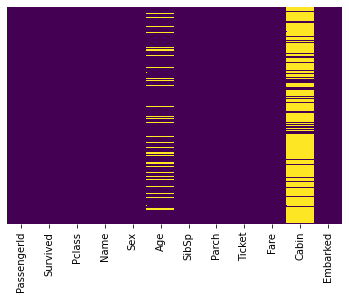

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

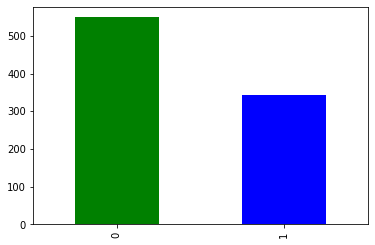

In [6]:
train['Survived'].value_counts().plot(kind='bar',color=['green','blue'])

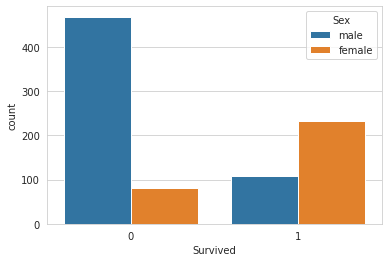

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

The plot shows that number female passengers who survived the disaster were almost double the number of male passengers while the number of deaths of male passenger is almost 4.5 times more than number of female passenger

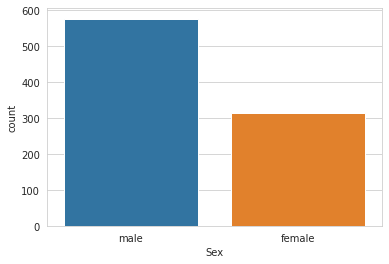

In [8]:
sns.countplot(x='Sex',data=train)

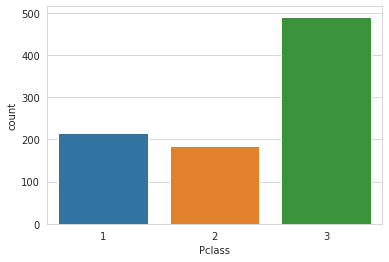

In [9]:
sns.countplot(x='Pclass',data=train)

This represents the classes of the ship and the number of passengers in each class. The higher the number the cheaper the class

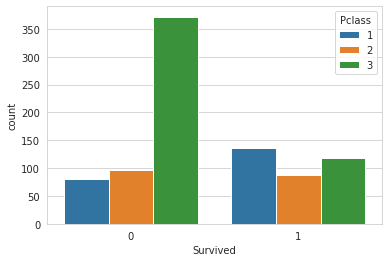

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=train)

The passengers who didn't survied belonged to the `third class` of the ship while those who survived more were in the `first class`

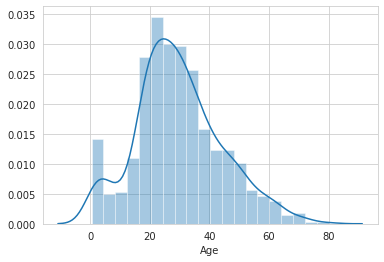

In [11]:
sns.distplot(train['Age'].dropna())

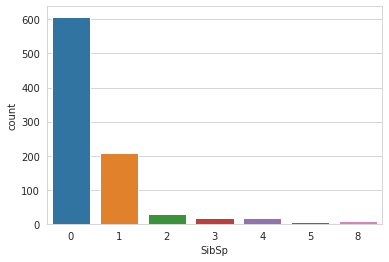

In [12]:
sns.countplot(x='SibSp',data=train)

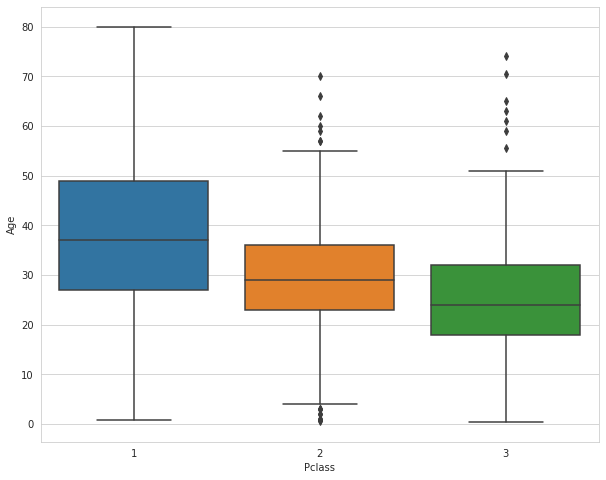

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=train)

This shows that people in the wealthier class are actually quite older than the people in lower class which makes sense
So to fill the missing age data we can fill those null data by using this interpretation

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

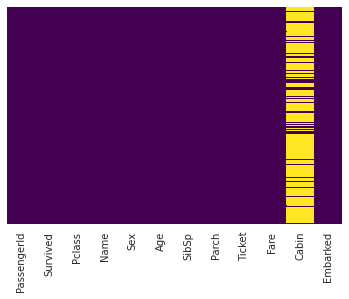

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we no longer missing any Age of passenger

In [17]:
#train.drop('Cabin',axis=1,inplace=True)

I first dropped the Cabin column because it had too many missing values but I am trying to improve this and try to add some meaningful values into this column
I am just assuming right now that the passenger that already have the Cabin data had some sort socio economic record and were more likely to be taken into consideration when loading into boat

In [18]:
train.Cabin.fillna("N",inplace=True)

In [19]:
train.Cabin = [i[0] for i in train.Cabin]

In [20]:
train.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     13.581250
F     18.696792
N     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. Let's write a simple function so that we can give cabin names based on the means.

In [21]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

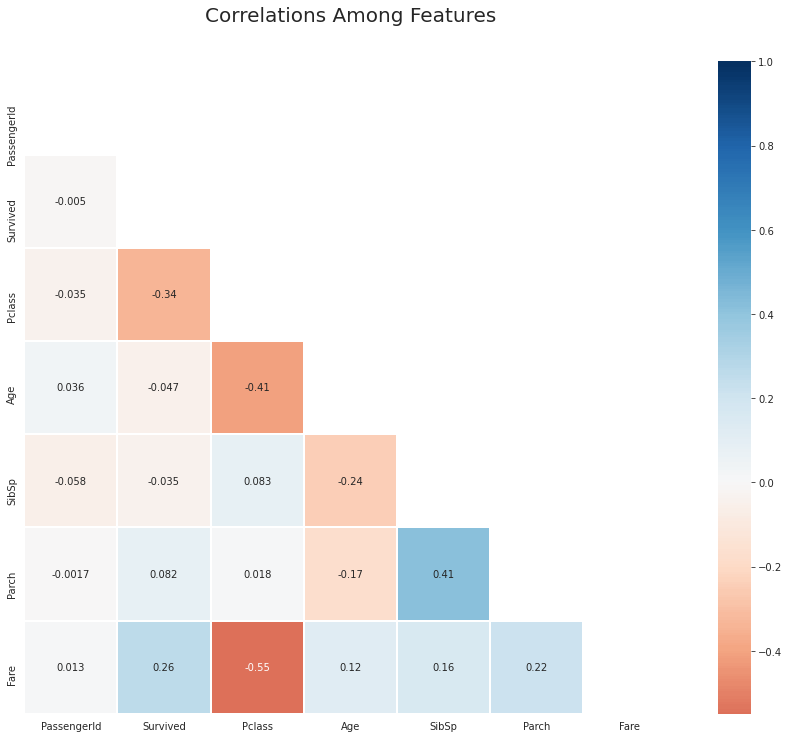

In [22]:
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [23]:
train.dropna(inplace=True)

In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [25]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [27]:
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,N,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1,0,0


In [29]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [30]:
train.drop('PassengerId',axis=1,inplace=True)

In [31]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
prediction = model.predict(x_test)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [36]:
confusion_matrix(y_test,prediction)

array([[89, 20],
       [15, 54]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8033707865168539